<a href="https://colab.research.google.com/github/Lucy-Moctezuma/SFSU-CodeLab-Work-/blob/main/MARC%20Machine%20Learning%20Project/1_Workshop/1B_Data_Drifting_and_Model_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative Comparison of 2020 Decision Tree Model using (2020 vs 2021) Data Features

Let's take a look at the bar graphs we have for both Decision Tree models (2020 vs 2021) created in the previous notebook:
At first glance we can see that in general the model had more accurate predictions in 2020 than in 2021, more of the yellow bars (predictions) are similar to the blue ones(2020 Data); whereas the in 2021, most of the yellow bars (predictions) are different from the teal colored bars (2021 Data). 

In this notebook we will further explore these differences, this time using metrics and other graphs to show you why and how our Summer 2020 Model differed in it's performace.

![Model-performance-comparison.jpg](images/Model-performance-comparison.jpg)

### 1) Import libraries needed to examine the differences in performance of Summer 2020 Model

In [ ]:
# Data Wrangling Imports
import pandas as pd
import numpy as np

# Model Evaluation Imports and Visualization
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Quantitative metrics of Model performance
from sklearn.metrics import mean_squared_error

### 2) Let's load the dataframes showing the differences between actual data and predictions for both years

**A)** Actual vs Predictions for 2020 Data made by our model 

By loading our csv files, we can see what our barcharts were actually plotting. Recall that the **BLUE** bars were the Actual cases_per_100K in 2020 and the **YELLOW** Bars were the values predicted bu our Summer 2020 Decision Tree Model 

In [ ]:
#this opens the file that contains the training data, data used to train the algorithm 
pred_vs_test_2020 = pd.read_csv("Model2020pred_vs_test_2020.csv")
pred_vs_test_2020 = pred_vs_test_2020[["county", "cases_per_100000","Predicted"]]
pred_vs_test_2020

,county,cases_per_100000,Predicted
0,Alameda,859.073508,702.805785
1,Colusa,1947.505865,2376.799046
2,San Benito,1649.433007,1150.798225
3,Inyo,877.906031,286.157593
4,Shasta,632.288886,1150.798225
5,Trinity,194.698218,286.157593
6,San Francisco,826.646344,702.805785
7,Mono,859.537282,179.051029
8,Siskiyou,291.200291,702.805785
9,Imperial,1981.747883,2376.799046


**B)** Actual vs Predictions for 2021 Data made by our model 

Similarly, the **GREEN** bars were the Actual cases_per_100K in 2021 and the **YELLOW** Bars were the values predicted bu our Summer 2020 Decision Tree Model 

In [ ]:
#this opens the file that contains the training data, data used to train the algorithm 
pred_vs_test_2021 = pd.read_csv("Model2020pred_vs_test_2021.csv")
pred_vs_test_2021 = pred_vs_test_2021[["county", "cases_per_100000","Predicted"]]
pred_vs_test_2021

,county,cases_per_100000,Predicted
0,Alameda,1372.631364,702.805785
1,Colusa,1894.392068,2376.799046
2,San Benito,1397.956952,1150.798225
3,Inyo,1847.938005,286.157593
4,Shasta,3555.992694,1150.798225
5,Trinity,1946.982178,286.157593
6,San Francisco,1337.696687,702.805785
7,Mono,2041.401046,179.051029
8,Siskiyou,2543.452543,702.805785
9,Imperial,1497.529337,2376.799046


### 3) Calculating the Root Mean Square Error (RMSE)

**Root Mean Square Error (RMSE):** is a measurement that shows us how far apart are our Predicted Values from our Actual Values on average. The lower it is the better the performace of the model. The RMSE allows us to see the average error using the units of our label (Cases_per_100K).

$$
RMSE = \sqrt{\frac{\sum\limits _{i=1} ^{N}(Predicted_{i} - Actual_{i})^{2}}{N}}
$$
N = Number of observations

We will calculate this metric for both set of predictions made by our 2020 Summer Decision Tree model:

In [ ]:
# this prints the RMSE value for the performance of the model using 2020 Data
print(f"RMSE on 2020 test set: {mean_squared_error(pred_vs_test_2020['cases_per_100000'], pred_vs_test_2020['Predicted'], squared=False)}")

RMSE on 2020 test set: 466.63833286828844


In [ ]:
# this prints the RMSE value for the performance of the model using 2021 Data
print(f"RMSE on 2021 test set: {mean_squared_error(pred_vs_test_2021['cases_per_100000'], pred_vs_test_2021['Predicted'], squared=False)}")

RMSE on 2021 test set: 1577.3791091382348


As you can observe our 2020 Summer Decision Tree Model performed better using 2020 Data.

### 4) Why do you think the accuracy of the model decreased from year 2020 to year 2021?

Machine Learning Models depend highly on the data they were trained on, therefore to understand why the performance decreased, we can take a look at the differences between the training data from year 2020 versus the one from 2021 

**A)** Let's load training data for both years once again to take a look at their metrics

In [ ]:
#this opens the files that contains the training data, data used to train the algorithm 
S2020_training= pd.read_csv("gs://nosi-sfsu-mlclass/Datasets/S2020_training.csv")
S2021_training= pd.read_csv("gs://nosi-sfsu-mlclass/Datasets/S2021_training.csv")

**B)** Taking a look at their summary statistics

In [ ]:
# View basic summary statistics of training set from 2020
S2020_training.describe()

,cases_per_100000,population,partially_vaccinated_percent,fully_vaccinated_percent,Unemployment_Rate,democrat_votes_percent,green_votes_percent,republican_votes_percent,libertarian_votes_percent,other_votes_percent
count,40.000000,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1198.064095,7.868419e+05,0.000016,0.000015,0.115548,0.539357,0.004690,0.436698,0.012617,0.006638
std,746.429340,1.708904e+06,0.000031,0.000032,0.020660,0.141376,0.001503,0.141133,0.002473,0.001735
min,160.513644,1.117000e+03,0.000000,0.000000,0.077882,0.264794,0.002850,0.157941,0.008314,0.002699
25%,728.794715,7.593875e+04,0.000002,0.000000,0.101237,0.421834,0.003633,0.325150,0.010968,0.005520
50%,1037.471459,2.673995e+05,0.000008,0.000004,0.112599,0.537902,0.004300,0.439941,0.012138,0.006475
75%,1537.211356,7.791370e+05,0.000015,0.000013,0.124802,0.649109,0.004998,0.552651,0.013993,0.007738
max,3339.214032,1.025756e+07,0.000174,0.000174,0.178749,0.823256,0.009091,0.715865,0.020243,0.012261


In [ ]:
# View basic summary statistics of training set from 2021
S2021_training.describe()

,cases_per_100000,population,partially_vaccinated_percent,fully_vaccinated_percent,Unemployment_Rate,democrat_votes_percent,green_votes_percent,republican_votes_percent,libertarian_votes_percent,other_votes_percent
count,40.000000,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2423.966703,7.868419e+05,0.072197,0.536199,0.115548,0.539357,0.004690,0.436698,0.012617,0.006638
std,1188.107936,1.708904e+06,0.018859,0.107252,0.020660,0.141376,0.001503,0.141133,0.002473,0.001735
min,591.029024,1.117000e+03,0.036177,0.359407,0.077882,0.264794,0.002850,0.157941,0.008314,0.002699
25%,1610.815456,7.593875e+04,0.064082,0.466568,0.101237,0.421834,0.003633,0.325150,0.010968,0.005520
50%,2443.145195,2.673995e+05,0.069203,0.521239,0.112599,0.537902,0.004300,0.439941,0.012138,0.006475
75%,2967.600857,7.791370e+05,0.079555,0.607344,0.124802,0.649109,0.004998,0.552651,0.013993,0.007738
max,7054.212933,1.025756e+07,0.145268,0.772677,0.178749,0.823256,0.009091,0.715865,0.020243,0.012261


**C)** Taking a look at the distributions between our label: interest cases_per_100K; and predictors: Unemployment_Rate and Fully_vaccinated_percent for both years

By running the code below we can observe that the **Unemployment Rate** was held constant from 2020 to 2021, however, the **Fully Vaccinated percentange** is very different. We can see that in 2020 the vaccination rates were basically non existent, whereas in 2021 there were more people being vaccinated, as Dr. Pleuni mentioned in her last video. Also we can observe that the number of cases_per_100K are overall higher in 2021, this could be due to more being more often reported by people and/or easier to identify given new public health measures.

Text(0.5, 1.0, '2021 Cases Per 100K')

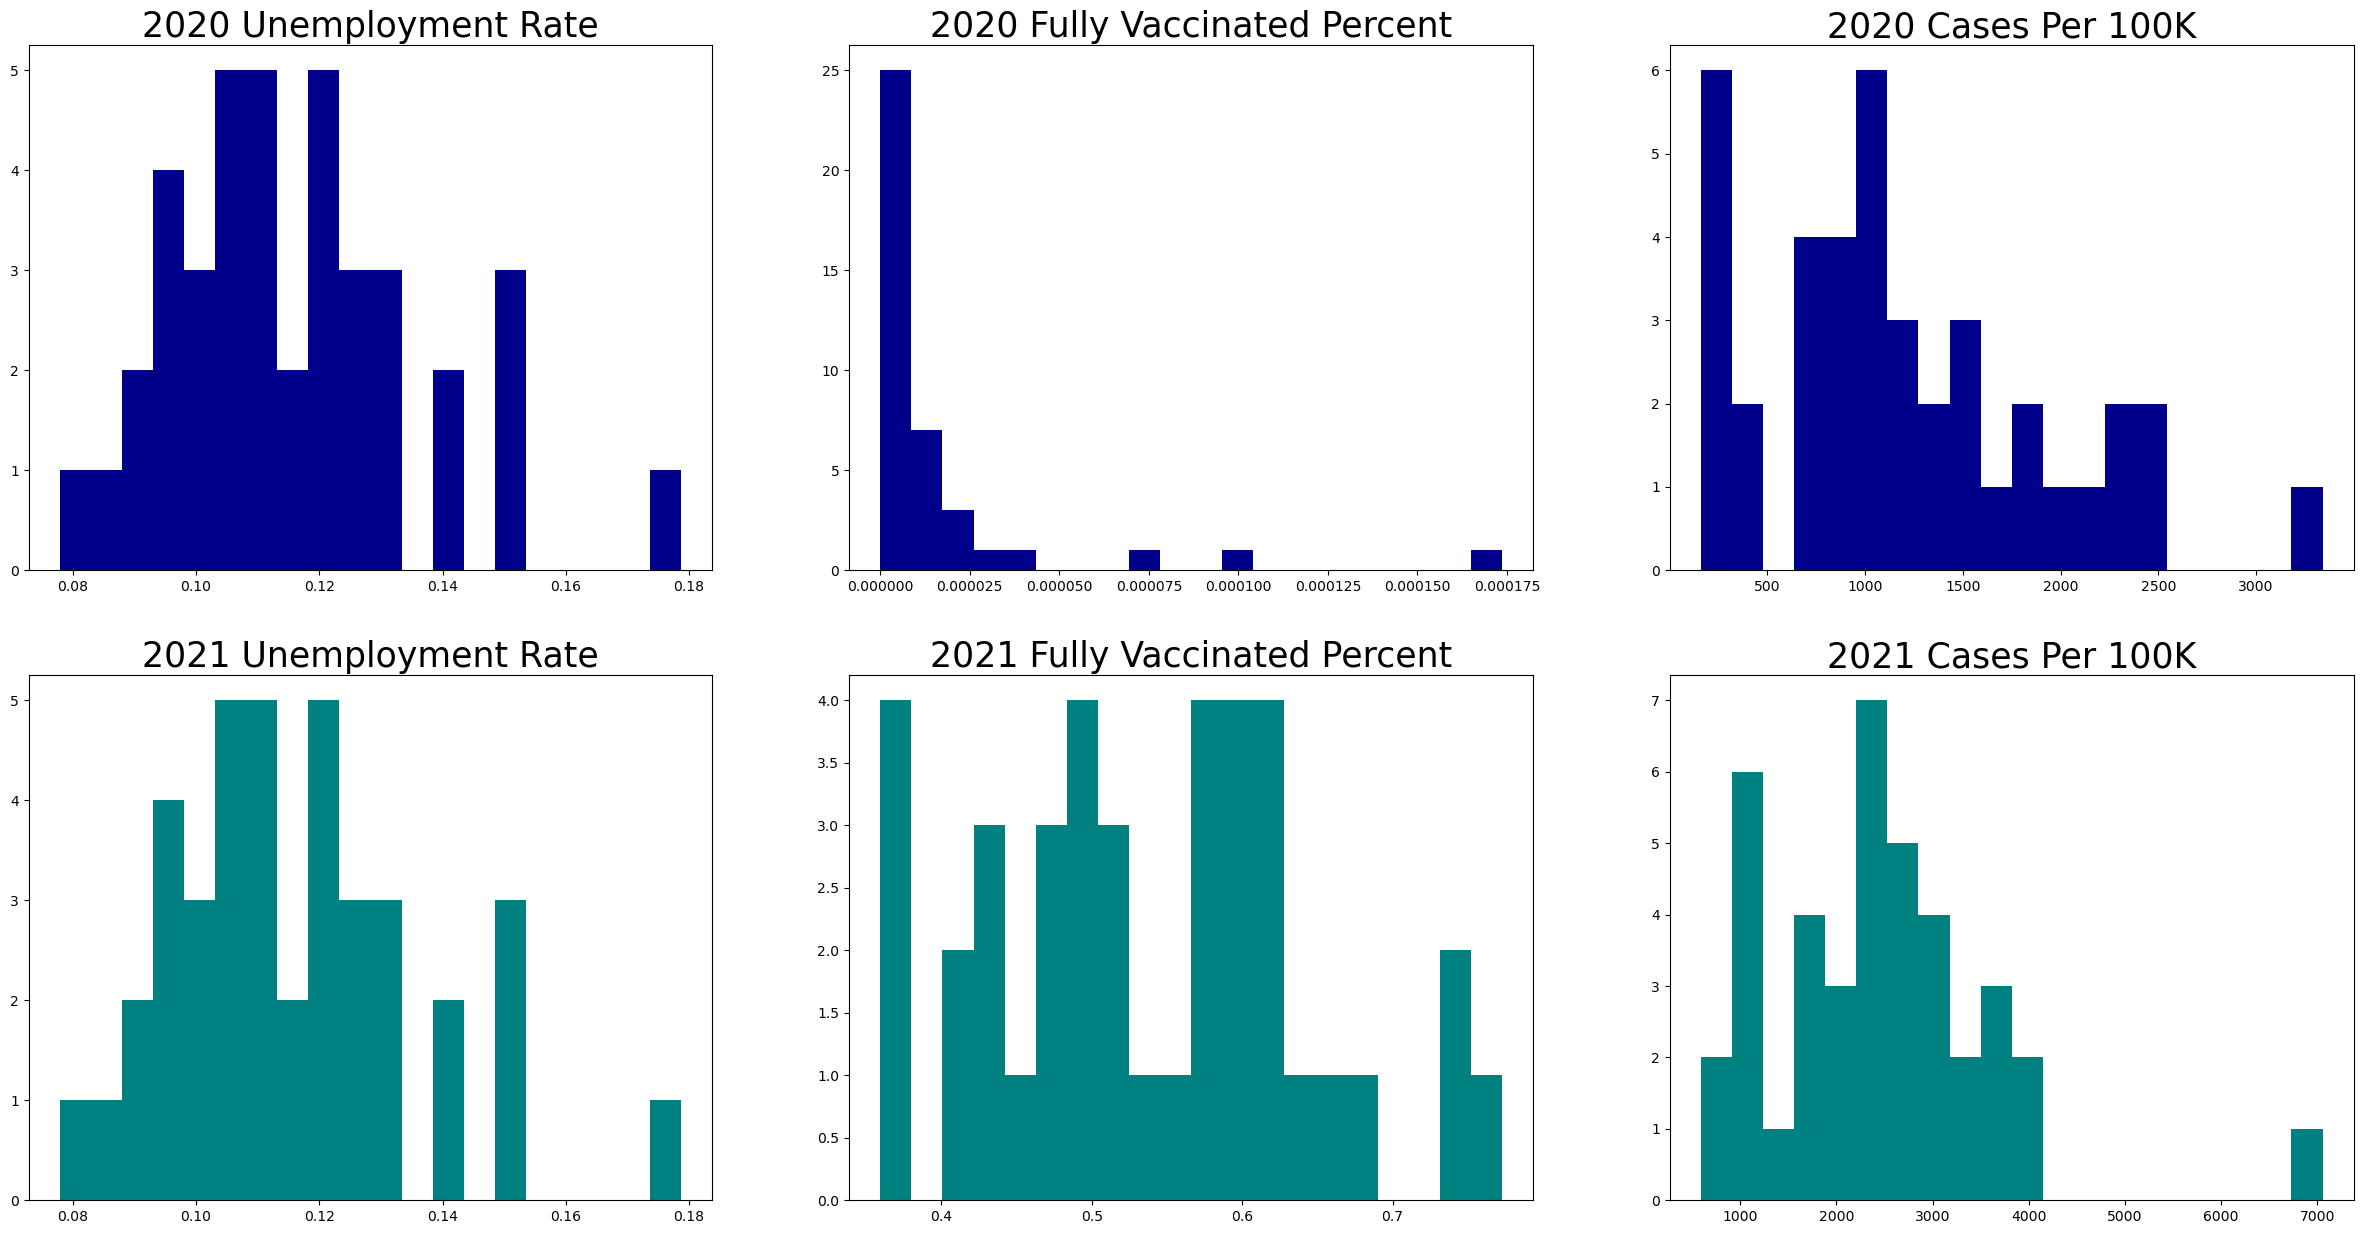

In [ ]:
# The following code created a composite graph commparing our original root node variable (unemployment_rate) to our number of cases (target label)
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(30,15)) 

# graphs the histogram for upperLeft corner
ax[0,0].hist(S2020_training['Unemployment_Rate'], bins=20, color="darkblue")
ax[0,0].set_title("2020 Unemployment Rate", size=25)

# graphs the histogram for upperMiddle area
ax[0,1].hist(S2020_training['fully_vaccinated_percent'], bins=20, color="darkblue")
ax[0,1].set_title("2020 Fully Vaccinated Percent", size=25)

# graphs the histogram for upperRight corner
ax[0,2].hist(S2020_training['cases_per_100000'], bins=20, color="darkblue")
ax[0,2].set_title("2020 Cases Per 100K", size=25)

# graphs the histogram for lowerLeft corner
ax[1,0].hist(S2021_training['Unemployment_Rate'], bins= 20, color="teal")
ax[1,0].set_title("2021 Unemployment Rate", size=25)

# graphs the histogram for lowerMiddle area
ax[1,1].hist(S2021_training['fully_vaccinated_percent'], bins=20,color="teal")
ax[1,1].set_title("2021 Fully Vaccinated Percent", size=25)

# graphs the histogram for lowerRight corner
ax[1,2].hist(S2021_training['cases_per_100000'], bins=20, color="teal")
ax[1,2].set_title("2021 Cases Per 100K", size=25)


**D)** Taking a look at the variable correlations between 2020 vs 2021

**Correlation:** is a metric that shows how strongly related are two variables. Correlation values range from -1 to 1. There are mainly 2 components to judge when we look at correlations:

General guidelines to judge the **direction or slope** of these relationship:
- If a correlation value is close to 0, then the variables are not very related to each other. 
- If a correlation value is close to 1, it means a positive correlation, thus the higher one variable is, the higher the other varible will also tend to be.
- If a correlation value is close to -1, it means a negative correlation, thus the higher one variable is, the lower the other variable will tend to be.

General guidelines to judge the **strenght** of these relationship:
- values from (-0.3 to +0.3) are generally considered a weak correlation
- values from (-0.5 to -0.3 AND 0.3 to 0.5) are generally considered a moderate correlation
- values from (-1.00 to -0.5 AND 0.5 to 1.00) are generally considered a strong correlation


Text(0.5, 1.0, '2021 Training Data Correlations')

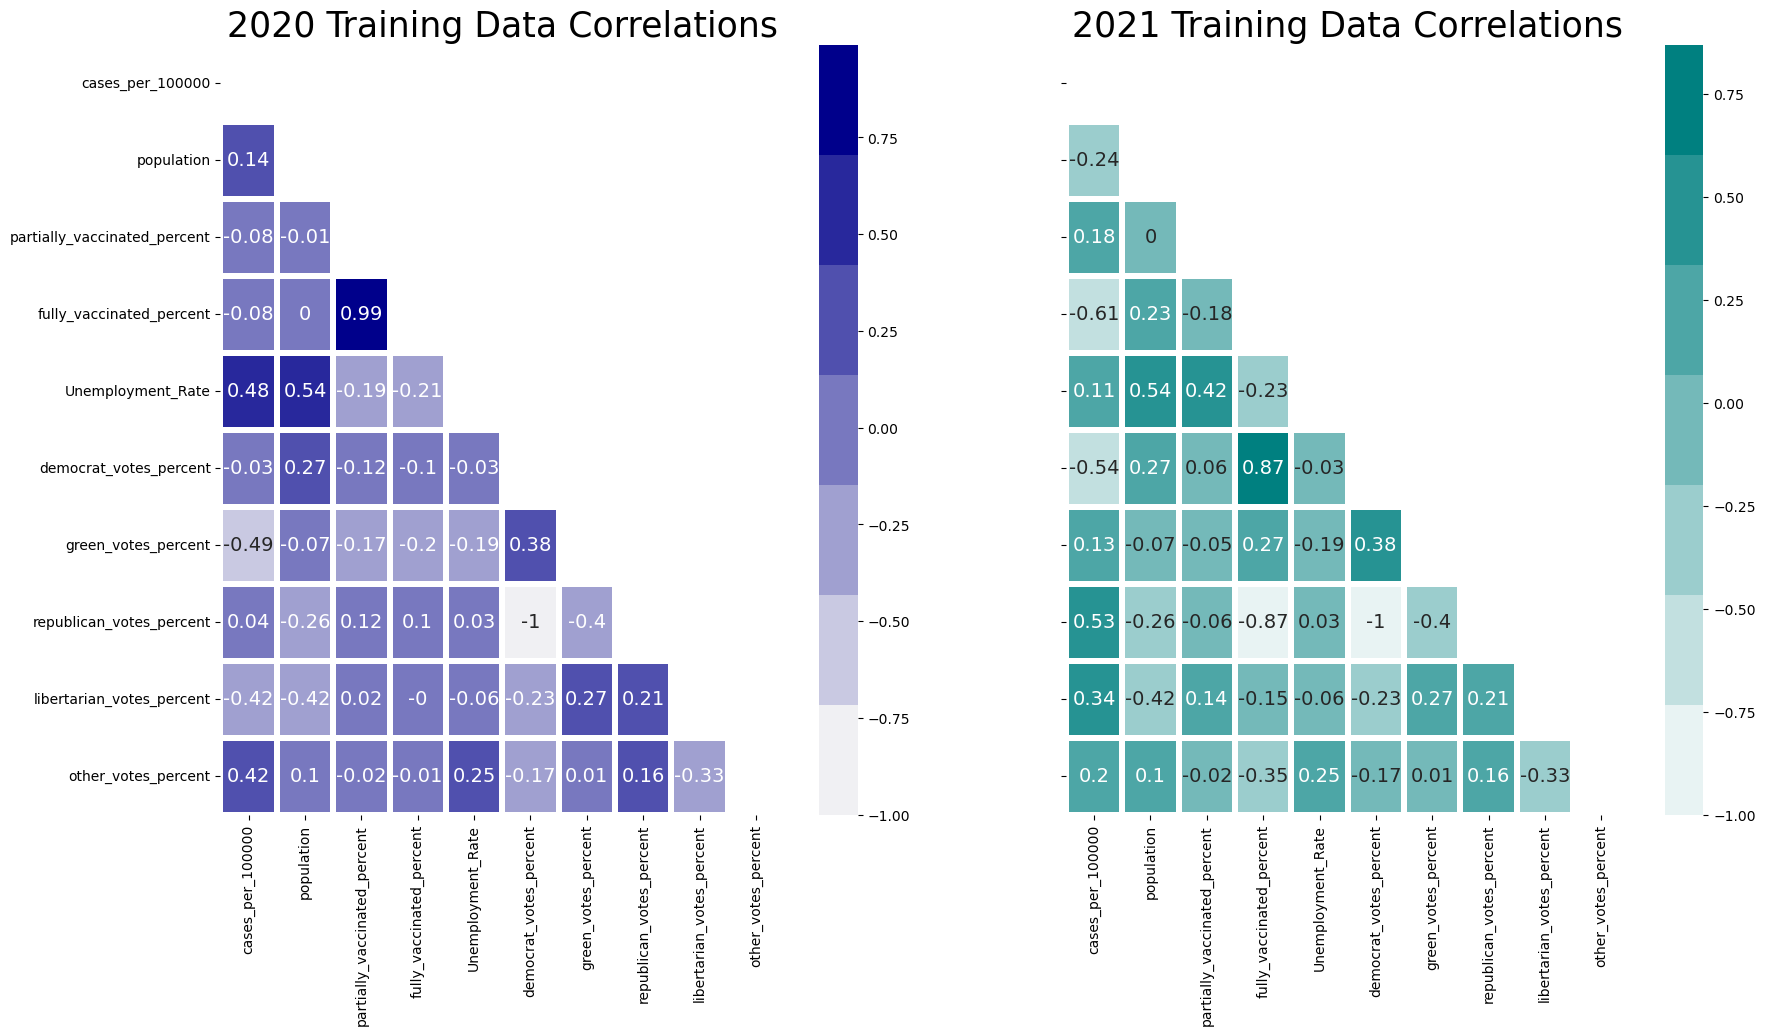

In [ ]:
# this code calculates the correlations within 2020 and 2021 datavariables
correlations_2020 = S2020_training.corr().round(2)
matrix2020 = np.triu(np.ones_like(correlations_2020))
correlations_2021 = S2021_training.corr().round(2)
matrix2021 = np.triu(np.ones_like(correlations_2021))

# the following creates a composite graph showcasing the correlation charts between both years
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,10), sharey=True, sharex=True)
g1 = sns.heatmap(correlations_2020,cmap=sns.light_palette("darkblue",n_colors=7),annot=True,annot_kws={"fontsize":14},cbar=True,ax=ax1, mask=matrix2020, linewidths=4)
g1.set_title("2020 Training Data Correlations", size=25)
g2 = sns.heatmap(correlations_2021,cmap=sns.light_palette("teal",n_colors=7),annot=True,annot_kws={"fontsize":14},cbar=True,ax=ax2, mask=matrix2021, linewidths=4)
g2.set_title("2021 Training Data Correlations", size=25)


- We can see that in 2020 we obtained moderate correlations between Cases_per_100K and **Unemployment_Rate (0.48)** , **Green Votes Percent (-0.49)**, **Libertarian Votes Percent (-0.42)** and **Other Votes Percent (0.42)**. The rest were weakly related to our target label.

- We can see that in 2021 we obtained stronger correlations between cases_per_100k and **Fully Vaccinated Percentage (-0.61)** , moderate ones with **Democrat Votes Percent(-0.54)** and **Republican Votes Percent(0.53)** and a weak moderate one with **Libertarian Votes percent (0.34)**


**IMPORTANT NOTE:** Recall that Dr. Pleuni reminded us in her video that these variables can only give us a correlation to Cases per 100K, they **DO NOT indicate Causality**, they only show us in general what variables are better at predicting our target label. Remember that there are a myriad of reasons that are beyond the variables noted in our exercise, for example we have not accounted for mask mandates in each county, average age of people accounted for on each county, public transportation use, at home versus on site working conditions, level of education, etc. Also note, that no one variable will be a perfect predictor, instead it is likely that several variables contribute to the overall prediction success of the model.


**E)** Creating Scatterplots and trendlines to visualize relationships

We can run the code below to visually inspect the trendlines between the Cases_per_100K for each year and see these relationships graphically.

**1)** Below we can see the scatterplots and trendline formed using the variables we found worth noting after looking at our 2020 correlation heatmap

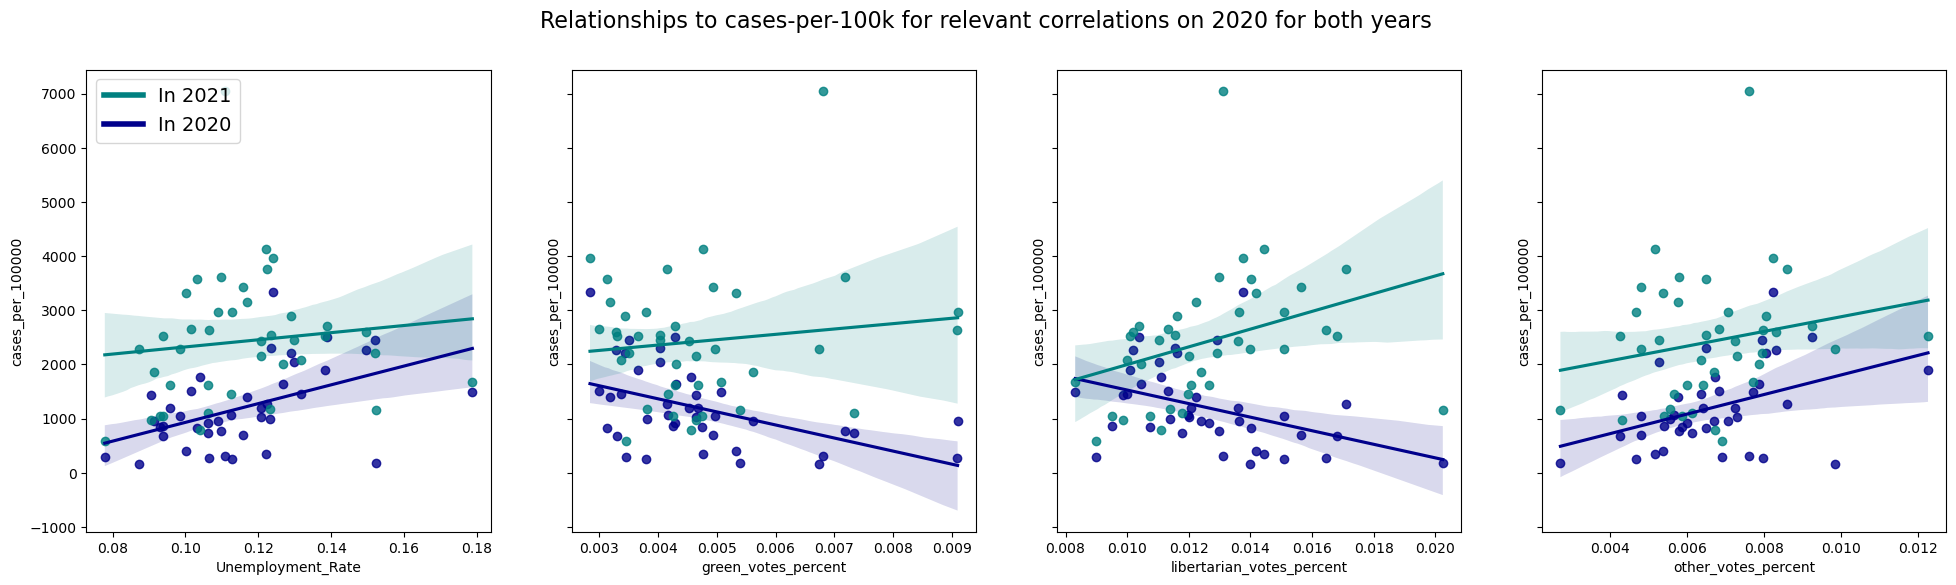

In [ ]:
# Visualize relationship between some columns and cases-per-100k with scatterplots, with best fit line for 2020
fig, (ax1,ax2,ax3,ax4)= plt.subplots(ncols=4, figsize=(24, 6), sharey = True)  # Plots will be in 1 row and 4 columns
fig.suptitle('Relationships to cases-per-100k for relevant correlations on 2020 for both years', fontsize=16)

#2020 Data Relationship plots

# Graphing the plot showing relationship between cases_per_100k and Unemployment Rate
g1 = sns.regplot(data=S2020_training, x='Unemployment_Rate',y='cases_per_100000', ax=ax1, color="darkblue")
# Graphing the plot showing relationship between cases_per_100k and green_votes_percent
g2 = sns.regplot(data=S2020_training, x='green_votes_percent', y='cases_per_100000', ax=ax2, color="darkblue")
# Graphing the plot showing relationship between cases_per_100k and libertarian_votes_percent
g3 = sns.regplot(data=S2020_training, x='libertarian_votes_percent', y='cases_per_100000', ax=ax3, color="darkblue")
# Graphing the plot showing relationship between cases_per_100k and other_votes_percent
g4 = sns.regplot(data=S2020_training, x='other_votes_percent', y='cases_per_100000', ax=ax4, color="darkblue")


#2021 Data Relationship plots

# Graphing the plot showing relationship between cases_per_100k and Unemployment Rate
h1 = sns.regplot(data=S2021_training, x='Unemployment_Rate',y='cases_per_100000', ax=ax1, color="teal")
# Graphing the plot showing relationship between cases_per_100k and green_votes_percent
h2 = sns.regplot(data=S2021_training, x='green_votes_percent', y='cases_per_100000', ax=ax2, color="teal")
# Graphing the plot showing relationship between cases_per_100k and libertarian_votes_percent
h3 = sns.regplot(data=S2021_training, x='libertarian_votes_percent', y='cases_per_100000', ax=ax3, color="teal")
# Graphing the plot showing relationship between cases_per_100k and other_votes_percent
h4 = sns.regplot(data=S2021_training, x='other_votes_percent', y='cases_per_100000', ax=ax4, color="teal")

#creating legend
custom_lines = [Line2D([0], [0], color="teal", lw=4), Line2D([0], [0], color="darkblue", lw=4)]
ax1.legend(custom_lines, ['In 2021', 'In 2020'], loc="upper left",prop={'size': 14})

**We can see that the relationships that were strong or in a particular direction in 2020 are not the same in 2021**

**2)** Below we can see the scatterplots and trendline formed using the variables we found worth noting after looking at our 2021 correlation heatmap, we will not plot the libertarian vote percentage as it was plotted already in the example above.

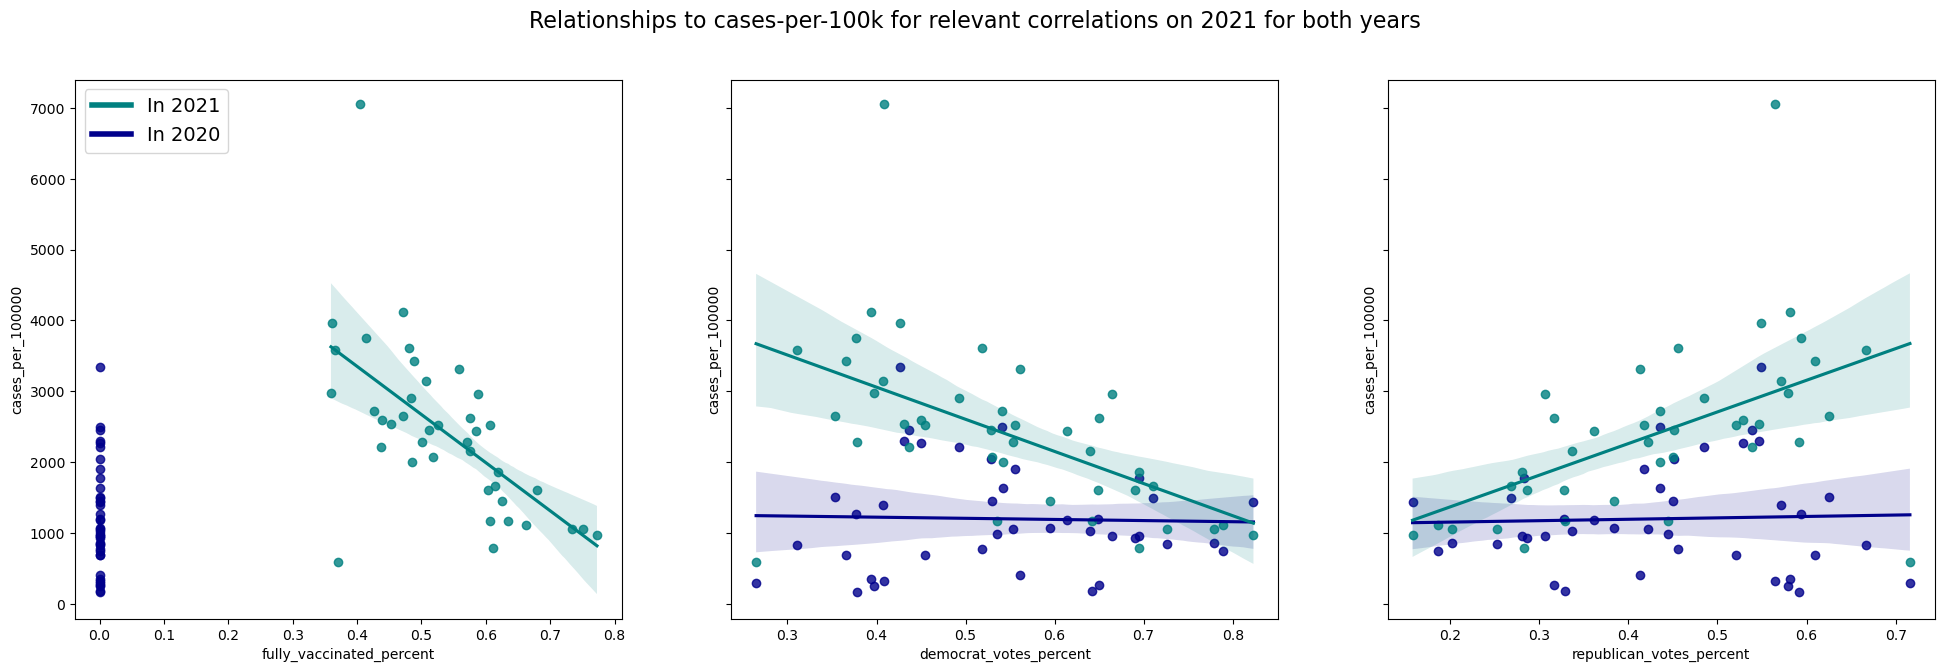

In [ ]:
# Visualize relationship between some columns and cases-per-100k with scatterplots, with best fit line for 2021
fig, (ax1,ax2,ax3)= plt.subplots(ncols=3, figsize=(24, 7), sharey = True)  # # Plots will be in 1 row and 3 columns
fig.suptitle('Relationships to cases-per-100k for relevant correlations on 2021 for both years', fontsize=16)

#2020 Data Relationship plots

# Graphing the plot showing relationship between cases_per_100k and fully_vaccinated_percent
g1 = sns.regplot(data=S2020_training, x='fully_vaccinated_percent',y='cases_per_100000', ax=ax1, color="darkblue")
# Graphing the plot showing relationship between cases_per_100k and democrat_votes_percent
g2 = sns.regplot(data=S2020_training, x='democrat_votes_percent', y='cases_per_100000', ax=ax2, color="darkblue")
# Graphing the plot showing relationship between cases_per_100k and republican_votes_percent
g3 = sns.regplot(data=S2020_training, x='republican_votes_percent', y='cases_per_100000', ax=ax3, color="darkblue")


#2021 Data Relationship plots

# Graphing the plot showing relationship between cases_per_100k and fully_vaccinated_percent
h1 = sns.regplot(data=S2021_training, x='fully_vaccinated_percent',y='cases_per_100000', ax=ax1, color="teal")
# Graphing the plot showing relationship between cases_per_100k and democrat_votes_percent
h2 = sns.regplot(data=S2021_training, x='democrat_votes_percent', y='cases_per_100000', ax=ax2, color="teal")
# Graphing the plot showing relationship between cases_per_100k and republican_votes_percent
h3 = sns.regplot(data=S2021_training, x='republican_votes_percent', y='cases_per_100000', ax=ax3, color="teal")

#creating legend
custom_lines = [Line2D([0], [0], color="teal", lw=4), Line2D([0], [0], color="darkblue", lw=4)]
ax1.legend(custom_lines, ['In 2021', 'In 2020'], loc="upper left",prop={'size': 14})

### 5) Reasons that our 2020 model performed worse when predicting 2021 Data

All in all we can see that the Training Data variables in the years 2020 and 2021 do not have the same relationship with our target variable (Cases_per_100K) as showcased by the trendlines we see in our scatterplots. There are different kind of changes that can happen in real life once our model is deployed, this is why it's important to to retrain our model from time to time. For more information about the different kinds of changes (or Drifts) that could occur over time check out this useful [website](https://arize.com/model-drift/?utm_source=google&utm_medium=cpc&utm_campaign=18216725893&utm_content=139136719885&utm_term=data%20drift&utm_term=data%20drift&utm_campaign=Monitor+ML+-+Search&utm_source=adwords&utm_medium=ppc&hsa_acc=9379871348&hsa_cam=18216725893&hsa_grp=139136719885&hsa_ad=620214790996&hsa_src=g&hsa_tgt=kwd-328660210229&hsa_kw=data%20drift&hsa_mt=e&hsa_net=adwords&hsa_ver=3&gclid=CjwKCAjw-L-ZBhB4EiwA76YzOet2ULiqRzKwwxgXsCJhh7NgueokMbk9sBee2XAX4WtP4aaEMxPrIxoCHRsQAvD_BwE)

We will focus on just one type of Drift:

**Data Drift:** Also called Features Drift or Covariate Drift. This happens when the relationship between the input features first used during  model training change. This drift is due to changes in the statistical properties, correlations and/or data distributions of the features since training.   


- For instance we can observe in our first set of scatterplots that Unemployment rate used to have a more pronounced positive slope in 2020, but then in 2021 this slope was less pronounced, in adition recall that these differences are also seen in other variables shown on both sets of scatterplots (libertarian_vote_percentage, democrat_vote_percentage, etc). Dr. Pleuni mentioned that in Summer 2020 most people were not vaccinated as it was not as available, whereas in 2021 it was more available; we can see this stark contrast in the first scatterplot of the second set because all the points in 2020 are clustered near the 0 percent fully vaccinated percent, whereas in 2021 we see that the lowest percentage is at least above 30% of people fully vaccinated.

To combat data drifting, models performance is evaluated from time to time, people stablish training data quality checks as part of their regular process using monitoring tools, user feedback is used, change models if needed to allow for more flexibility, etc.
